<a href="https://colab.research.google.com/github/midiazdi/ML/blob/master/Arboles_de_Decision_y_Bosque_Aleatorio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tarea

Implemente una regresión por árboles de decisión y por bosque aleatorio en el conjunto de datos adjunto. Compare estos resultados con la regresión lineal múltiple. Qué puede decir de estos algoritmos?

#ánalisis exploratorio

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
from IPython.display import clear_output
import graphviz

In [4]:
data = pd.read_csv("50_Startups.csv")
#data.head(5)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


 Los datos recopilados incluyen información sobre la inversión en Investigación y Desarrollo (R&D Spend), los gastos de Administración (Administration), los gastos en Marketing (Marketing Spend), el estado donde opera la empresa (State) y las ganancias obtenidas (Profit). Todo esto de 50 empresas

 ___



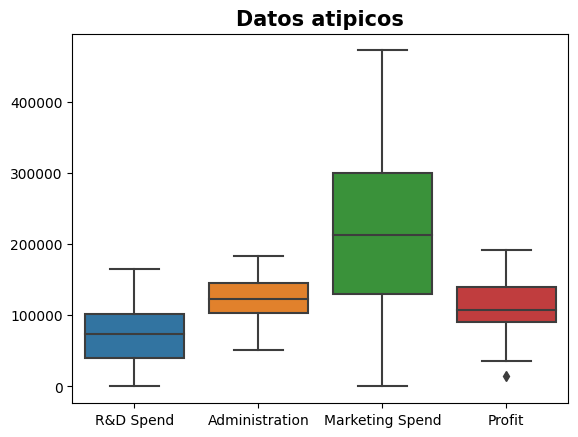

In [5]:
titleFontStyle = {'family':'verdana', 'weight':'bold','fontsize':15}
labelFontStyle = {'family':'verdana', 'weight':'light','style':'italic','fontsize':12}

sns.boxplot(data)
plt.title("Datos atipicos",fontdict=titleFontStyle)


#limpiar la salida del grafico
clear_output(wait=True)

No se ven datos atípicos, sin embargo, la técnica de árboles de regresión no es sensible a este tipo de datos
_____


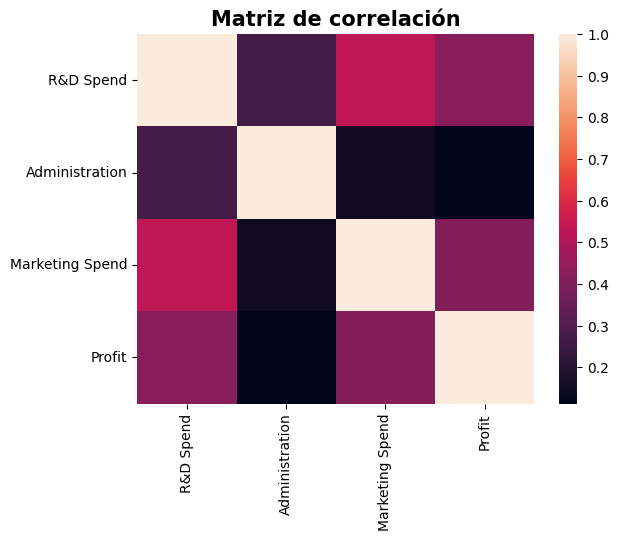

In [ ]:
sns.heatmap(data.corr())
plt.title('Matriz de correlación', fontdict=titleFontStyle)

#limpiar la salida del grafico

clear_output(wait=True)

No se aprecia correlaciones significativas
____

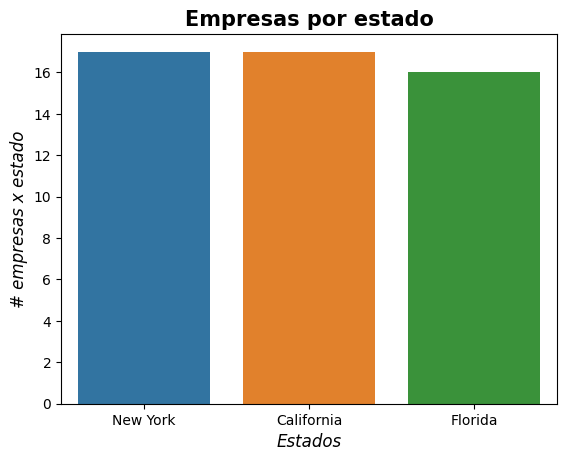

In [ ]:
sns.countplot(x='State', data=data)
plt.title('Empresas por estado', fontdict=titleFontStyle)
plt.xlabel('Estados', fontdict=labelFontStyle)
plt.ylabel('# empresas x estado',fontdict=labelFontStyle)
#limpiar la salida del grafico
clear_output(wait=True)

#Árbol de regresión

In [23]:
#the dependent varible is separated from the rest of the variable
columns = ['California','Florida','New York','R&D','Administration','Marketing Spend']
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

# data is separated into test data and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
numeric_col = X_train.select_dtypes(include=['int','float64']).columns.to_list()
object_col = X_train.select_dtypes(include=['object', 'category']).columns.to_list()

#the transformation of de column that have dummy variables is done
ct1 = ColumnTransformer(transformers=[('scaler', StandardScaler(), numeric_col)],remainder='passthrough')
ct2 = ColumnTransformer(transformers=[('onehot', OneHotEncoder(), object_col)],remainder='passthrough')

scaler = StandardScaler()

X_train_ct = ct1.fit_transform(X_train)
X_train_ct = ct2.fit_transform(X_train)
X_test_ct = ct1.fit_transform(X_test)
X_test_ct = ct2.fit_transform(X_test)
y_train_ct = scaler.fit_transform(np.reshape([y_train], (len(y_train),1)))
y_test_ct = scaler.transform(np.reshape([y_test], (len(y_test),1)))



### implementación del modelo

In [27]:
# the regression tree model is created
tree = DecisionTreeRegressor(max_depth=3, random_state=0 )
arbol = tree.fit(X_train_ct, y_train_ct)

In [29]:

y_predict = tree.predict(X_test_ct)
score = tree.score(X_test_ct, y_test_ct)
print('{{',score,'}}')
#r2 = r2_score(y_test, y_predict)
#print(r2)


{{ 0.9280656826481832 }}


Text(0.5, 1.0, 'Arbol')

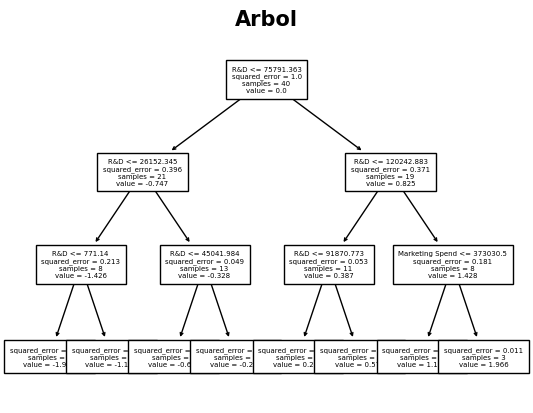

In [30]:
#fig, ax = plt.subplots(figsize=(12, 5))
columns = ['California','Florida','New York','R&D','Administration','Marketing Spend']
plot = plot_tree(
            decision_tree = tree  ,
            feature_names = columns,
            #class_names   = 'Profit',
            #filled        = True,
            #impurity      = False,
            fontsize      = 5
            #precision     = 2
       )
plt.title('Arbol',fontdict=titleFontStyle)

#Ramdom Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

bosque = RandomForestRegressor(
            n_estimators = 200,
            random_state = 0
         )
bosque.fit(X_train_ct,y_train_ct)
y_pred = bosque.predict(X_test_ct)


score_bosque = bosque.score(X_test_ct, y_test_ct)
print(score_bosque)
r2 = r2_score(y_test_ct, y_pred)
print(r2)


<ipython-input-32-2c68660943ef>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  bosque.fit(X_train_ct,y_train_ct)


0.9676249078505087
0.9676249078505087


En la comparación entre un árbol de regresión y un Random Forest Regressor, se observa que el Random Forest Regressor supera significativamente al árbol de regresión en términos de rendimiento predictivo. El árbol de regresión obtuvo un puntaje de -0.2, lo que indica un rendimiento deficiente y posiblemente un sobreajuste, mientras que el Random Forest Regressor logró un puntaje de 0.23, lo que sugiere una capacidad mucho mejor para modelar y predecir los datos. Esto demuestra la ventaja de utilizar un ensamblaje de árboles como Random Forest en lugar de un solo árbol de regresión para mejorar la precisión de las predicciones

#Implementación con otro conjunto de datos

In [ ]:
salarios = pd.read_csv('Salary_Data.csv')
Xs = salarios.iloc[:,:-1].values
ys = salarios.iloc[:,-1].values

Xs_test, Xs_train, ys_test, ys_train = train_test_split(Xs,ys, test_size=0.2)

Text(0.5, 1.0, 'Salarios frente a años de experiencia')

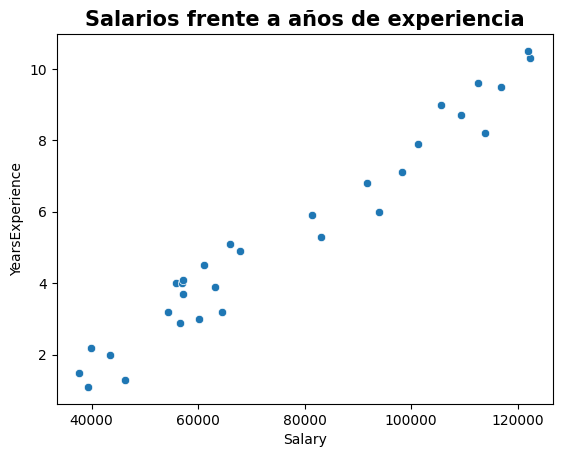

In [ ]:
sns.scatterplot(x=salarios['Salary'],y=salarios['YearsExperience'])
plt.title('Salarios frente a años de experiencia', fontdict=titleFontStyle)

In [ ]:
#implementación del modelo
arbol_salario = DecisionTreeRegressor(max_depth=2, random_state=0)
arbol_salario.fit(Xs_train, ys_train)

DecisionTreeRegressor(max_depth=2, random_state=0)

0.8167220544635644


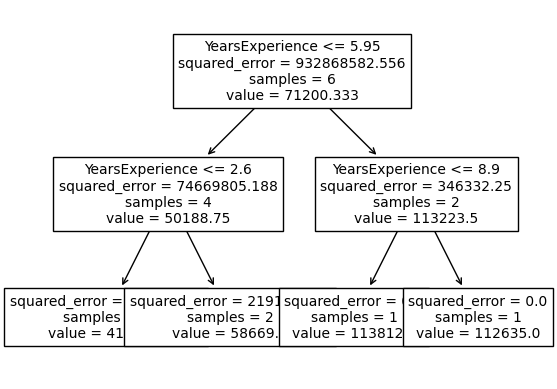

In [ ]:

ys_pred = arbol_salario.predict(Xs_test)

plot = plot_tree(decision_tree=arbol_salario ,feature_names = list(salarios.columns), fontsize=10)

In [ ]:
print(ys_pred)
print(ys_test)
print(arbol_salario.score(Xs_test,ys_test))

[ 58669.5  58669.5 113812.   41708.   58669.5  58669.5 112635.   58669.5
 112635.   58669.5  58669.5  41708.   58669.5  58669.5 112635.  112635.
 113812.   58669.5 113812.   58669.5  41708.   58669.5 113812.  113812. ]
[ 83088.  66029.  93940.  46205.  67938.  81363. 121872.  54445. 105582.
  55794.  57081.  39343.  56642.  64445. 116969. 122391. 109431.  61111.
  91738.  56957.  37731.  63218.  98273. 101302.]
0.8167220544635644


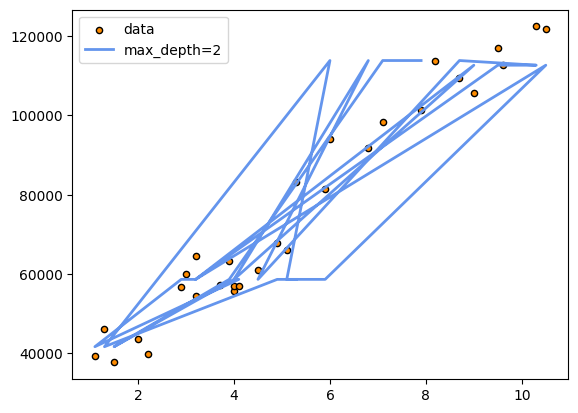

In [ ]:
plt.figure()
plt.scatter(Xs,ys,s=20, edgecolor="black", c="darkorange", label="data")
plt.plot(Xs_test,ys_pred,color="cornflowerblue", label="max_depth=2", linewidth=2)
plt.legend()